# Day 4: Milestone Action Items
Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions. 

1. How many different companies are represented in the data set?
2. What is the total number of jobs created for businesses in Queens?
3. How many different unique email domains names are there in the data set?
4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
5. Save your result for the previous question as a CSV file.


In [262]:
import pandas as pd
import numpy as np
from collections import defaultdict
filename = "Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_20231225.csv"
data = pd.read_csv(filename)
data.head()
print(data.head())
listCol = (data.columns)
print(f"list of Columns = {listCol}")

   Period                                 Company Name     company contact  \
0  FY2018                         139 ACA Realty, Inc.     Eitan Chandally   
1  FY2018  141 Lake Avenue Realty c/o JR Produce, Inc.           Josef Raz   
2  FY2018                       14-10 123rd Street LLC  Danica/Ivan Drazic   
3  FY2018                      183 Lorriane Street LLC        Tom Sapienza   
4  FY2018                    21st Century Optics, Inc.     Ralph Woythaler   

                       company email company phone              Address  \
0                  barbara@dial7.com    7187076123    43-23 35th Street   
1                jrproduce@gmail.com    7183708782      141 Lake Avenue   
2          ddrazic@atjelectrical.com    7183210117   14-10 123rd Street   
3                tsapienza@KLCNY.com    2128405588  183 Lorraine Street   
4  rwoythaler@21st centuryoptics.com    7183922310    47-00 33rd Street   

               City State  Postcode                          Industry  ...  \
0 

#### 1. How many different companies are represented in the data set?

In [26]:
companyNames = data["Company Name"]
uniqueNames = pd.Series(companyNames).unique()
numUniqueNames = len(uniqueNames)
print(f"number of unique company names = {numUniqueNames}")

number of unique company names = 787


#### 2. What is the total number of jobs created for businesses in Queens?


In [208]:
queensData = data[data["Borough"]=='QUEENS']
numQueens = print(len(queensData))
queensData["Job created"]
#queensData = data.loc[data["Borough"]=='QUEENS', "Job created"].notna()
jobNoNAN = queensData["Job created"].notna()
print(f"len queensData = {len(queensData)}")
#print(f"jobNoNAN = {jobNoNAN[:5]}")
print(f"len jobNoNAN = {len(jobNoNAN)}")
queensDataNoNAN = queensData[jobNoNAN]["Job created"]
print(queensDataNoNAN[:5])
print(f"number of jobs created in Queens = {sum(queensDataNoNAN)}")

842
len queensData = 842
len jobNoNAN = 842
24    10.0
34    16.0
41    25.0
50     5.0
55    40.0
Name: Job created, dtype: float64
number of jobs created in Queens = 1196.0


#### 3. How many different unique email domains names are there in the data set?

In [76]:
companyEmails = data["company email"]
uniqueEmails = pd.Series(companyEmails).unique()
numUniqueEmails = len(uniqueEmails)
print(f"number of unique company emails = {numUniqueEmails}")

number of unique company emails = 761


#### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 
#### Question: 
There are 5 items in the dataset header with the keyword "savings". It is not clear which of these items should be considered for finding the total savings and how to count the total number of corresponding NTA to evaluate the average of the savings. Here, we only consider the item "Savings from beginning receiving benefits" to find the total savings. 

In [343]:
ntaData = data["Neighborhood Tabulation Area (NTA) (2020)"]
ntaValues = ntaData.value_counts()
#print(ntaValues)
min5Business = ntaValues[ntaValues>=5].index.to_list()
ntajob5Business = data["Neighborhood Tabulation Area (NTA) (2020)"].isin(min5Business)#["Job created"].notna()
#print("ntajob5BusinessNoNAN = ", ntajob5BusinessNoNAN)
ntajob5BusinessNoNAN = data[ntajob5Business]["Job created"].notna()

totalJobsNTA = defaultdict(float)
totalCountNTA = defaultdict(float)
aveJobsNTA = defaultdict(float)

totalSavingNTA = defaultdict(float)
totalSavingCountNTA = defaultdict(float)
aveSavingNTA = defaultdict(float)
#print(f"ntajob5BusinessNoNAN = {ntajob5BusinessNoNAN}")
for i in range(len(data)):
    ntai = data.loc[i]["Neighborhood Tabulation Area (NTA) (2020)"]
    if not np.isnan(data.loc[i]["Job created"]):
        totalCountNTA[ntai] += 1        
        totalJobsNTA[ntai] += data.loc[i]["Job created"]        
    if not np.isnan(data.loc[i]['Savings from beginning receiving benefits']):
        totalSavingCountNTA[ntai] += 1            
        totalSavingNTA[ntai] += data.loc[i]["Savings from beginning receiving benefits"]

for k in totalCountNTA.keys():
    aveSavingNTA[k]=totalSavingNTA[k]/totalSavingCountNTA[k]
    
for k in totalCountNTA.keys():
    aveJobsNTA[k]=totalJobsNTA[k]/totalCountNTA[k]
    
print(f" average total jobs = {aveJobsNTA}", "\n\n\n")
print(f" average total savings = {aveSavingNTA}")

"""
data['Gas Savings'].notna()
data['Cogen savings'][:20]
data['Electric Savings'][:20]
data['Savings from beginning receiving benefits']
""";

 average total jobs = defaultdict(<class 'float'>, {'BK0503': 59.285714285714285, 'BK0104': 10.38888888888889, 'BK0102': 7.5, 'QN0701': 10.0, 'QN0105': 11.666666666666666, nan: 556.8095238095239, 'QN0402': 5.0, 'BK0702': 7.666666666666667, 'QN1204': 40.0, 'BK0401': 7.0, 'QN0202': 13.88888888888889, 'BK0601': 10.777777777777779, 'BX0201': 7.823529411764706, 'QN0261': 30.0, 'BX0101': 9.636363636363637, 'BK0101': 5.333333333333333, 'BK1602': 13.75, 'BK0301': 4.0, 'QN1303': 10.0, 'QN0501': 11.470588235294118, 'QN0101': 14.285714285714286, 'BK1101': 30.0, 'SI0305': 16.0, 'QN0104': 7.666666666666667, 'MN1102': 4.0, 'BX1203': 2.0, 'SI0107': 150.0, 'MN0401': 5.0, 'QN0704': 45.0, 'BX1161': 200.0, 'MN0902': 5.0, 'BX1001': 5.0, 'QN1202': 5.0, 'QN0103': 2.0, 'BX0301': 14.0, 'QN0503': 10.0, 'BK1702': 11.0, 'BX0302': 7.0, 'QN0502': 3.0, 'QN1402': 100.0, 'MN1202': 15.0, 'QN0203': 10.0, 'BK1803': 8.333333333333334, 'BK1802': 6.0, 'QN1102': 22.0, 'MN0501': 4.0, 'QN0201': 11.142857142857142, 'QN0902': 6

#### 5. Save your result for the previous question as a CSV file.

In [339]:
NTAJobSaving = []
for k in aveJobsNTA.keys():
    job = round(aveJobsNTA[k], 3)
    saving = round(aveSavingNTA[k], 3)
    dictk = {'NTA':k, 'Average Total Jobs':job, 'Average Total Savings':saving}
    NTAJobSaving.append(dictk)    

with open('totalJobsSaving.csv', 'w') as f:
    # Write all the dictionary keys in a file with commas separated.
    f.write(','.join(NTAJobSaving[0].keys()))
    f.write('\n') 
    for row in NTAJobSaving:
        # Write the values in a row.
        f.write(','.join(str(x) for x in row.values()))
        f.write('\n') 

# Day 5: Milestone Action Items

1. Go through the Introductory Tutorials on Matplotlib.
2. Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
   i) scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
   ii) histogram of the log of the average total savings.
   iii) line plot of the total jobs created for each month.
3. If you have time, take a look at this short tutorial on Altair.


#### i) Create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

53
53


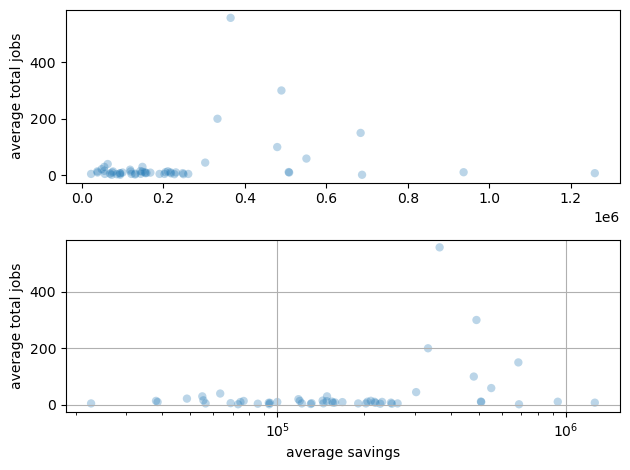

In [366]:
import matplotlib.pyplot as plt

for k in totalCountNTA.keys():
    aveSavingNTA[k]=totalSavingNTA[k]/totalSavingCountNTA[k]
listAveSavingNTA = list(aveSavingNTA.values())    
print(len(listAveSavingNTA))
for k in totalCountNTA.keys():
    aveJobsNTA[k]=totalJobsNTA[k]/totalCountNTA[k]
listAveJobsNTA = list(aveJobsNTA.values())
print(len(listAveJobsNTA))
fig, ax = plt.subplots(2)
#for color in ['tab:blue', 'tab:orange', 'tab:green']:    
ax[0].scatter(listAveSavingNTA, listAveJobsNTA, marker='o', 
        alpha=0.3, edgecolors='none')
#ax[0].set_xlabel("average savings")
ax[0].set_ylabel("average total jobs")

ax[1].scatter(listAveSavingNTA, listAveJobsNTA, marker='o', 
        alpha=0.3, edgecolors='none')
ax[1].set_xscale('log')
ax[1].set_xlabel("average savings")
ax[1].set_ylabel("average total jobs")

#ax[0].legend()
ax[1].grid(True)
fig.tight_layout() 
plt.show()


#### ii) Create a histogram of the log of the average total savings.

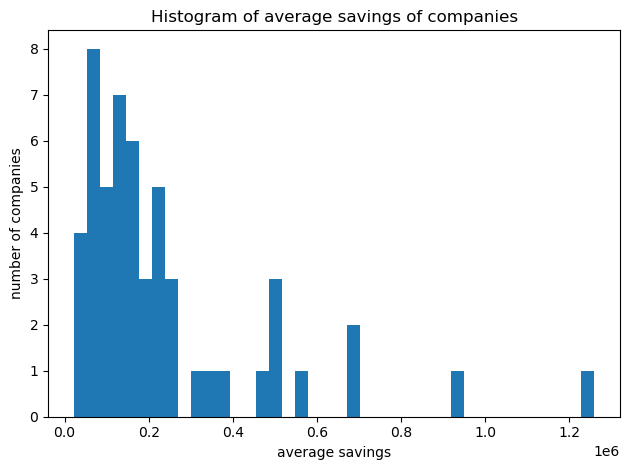

In [376]:
nbins = 40
#x = 
fig, ax = plt.subplots(tight_layout=True)
"""
n, bins, patches = ax.hist(x, num_bins, density=True)

ax.plot(bins, listAveSavingNTA, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')
"""             
ax.hist(listAveSavingNTA, bins=nbins)
ax.set_xlabel('average savings')
ax.set_ylabel('number of companies')
ax.set_title('Histogram of average savings of companies')
fig.tight_layout()
plt.show()